## Descriptive statistics

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('../Data/raw_analyst_ratings.csv')

In [17]:
data.head(35)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [10]:
data.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [9]:
# check for missing values
data.isna().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [12]:
articles_per_publisher = data['publisher'].value_counts()
articles_per_publisher

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64

The above query shows us that Paul Quintaro is the most active publisher with as much as 228373 articles published.

Analyzing news frequency trend over time

In [7]:
#converting datetime column to DateTime object
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [21]:
#extract year, month and day from the data
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [22]:
#group trend by year, month and day
# Group by year and count articles
yearly_trends = data.groupby('year').size()

# Group by month and count articles
monthly_trends = data.groupby('month').size()

# Group by day and count articles
monthly_trends = data.groupby('day').size()

In [24]:
#import matplotlib
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


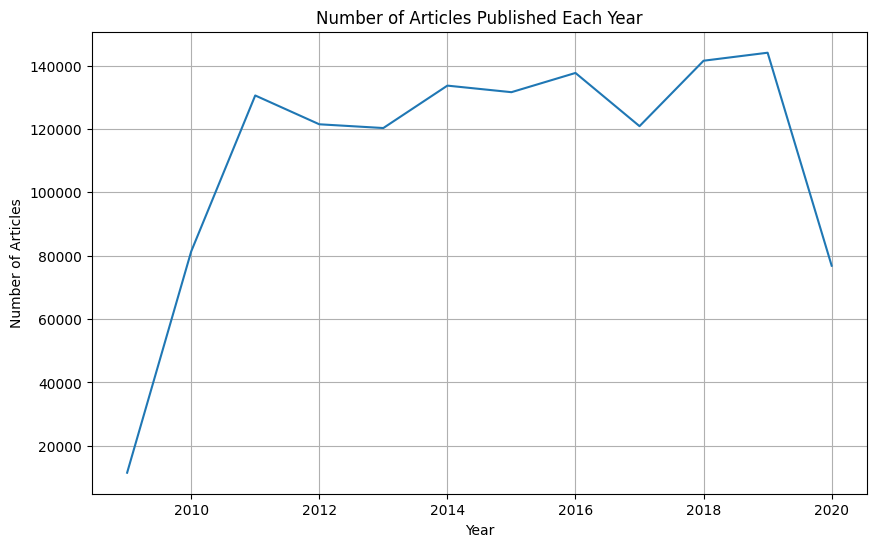

In [25]:
# Plot yearly trends
yearly_trends.plot(kind='line', figsize=(10, 6))
plt.title('Number of Articles Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

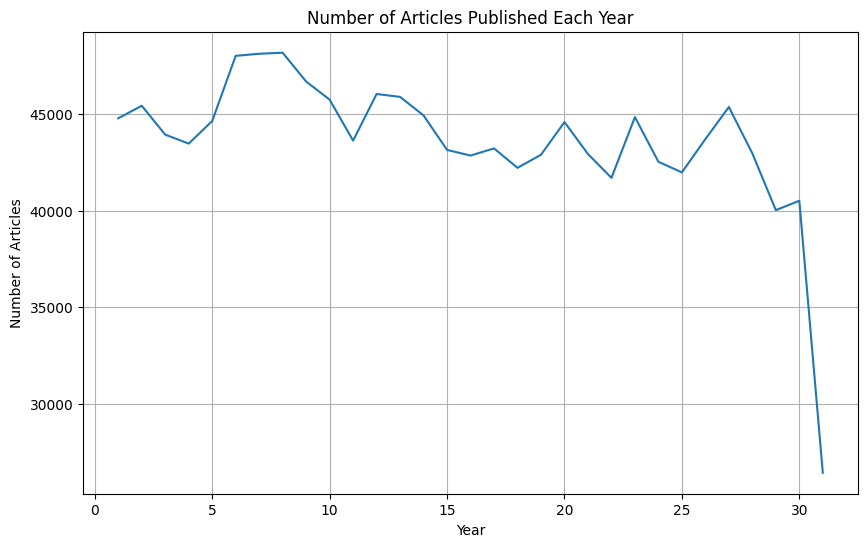

In [26]:
# Plot monthly trends
monthly_trends.plot(kind='line', figsize=(10, 6))
plt.title('Number of Articles Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

## Text analysis (Sentiment analysis and Topic modelling)

In [ ]:
from scripts.sentiment_analyzer import preprocess_text, get_sentiment

In [17]:
# preprocessing the headline and creating a new column (feature) to store the clean-preprocessed texts
data['cleaned_headline'] = data['headline'].apply(preprocess_text)

In [18]:
#categorizing the headlines according to sentiments (positive, negative or neutral)
data['sentiment'] = data['cleaned_headline'].apply(get_sentiment)

In [22]:
data.tail(10)

,Unnamed: 0,headline,url,publisher,date,stock,cleaned_headline,sentiment
1407318,1413839,"Earnings Scheduled For August 22, 2012",https://www.benzinga.com/news/earnings/12/08/2...,Monica Gerson,2012-08-22,ZX,earn schedul august 22 2012,neutral
1407319,1413840,5 Auto Parts Stocks With The Highest Operating...,https://www.benzinga.com/trading-ideas/12/07/2...,Lisa Levin,2012-07-30,ZX,5 auto part stock highest oper margin,neutral
1407320,1413841,China Zenix Announces Open Market Stock Purcha...,https://www.benzinga.com/news/11/12/2233145/ch...,Eddie Staley,2011-12-30,ZX,china zenix announc open market stock purchas ...,neutral
1407321,1413842,China Zenix Auto International Awarded Wheel S...,https://www.benzinga.com/news/11/11/2153607/ch...,Allie Wickman,2011-11-28,ZX,china zenix auto intern award wheel suppli con...,neutral
1407322,1413843,China Zenix Auto International Selected as Exc...,https://www.benzinga.com/news/11/11/2142369/ch...,Eddie Staley,2011-11-21,ZX,china zenix auto intern select exclus wheel pr...,neutral
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX,top narrow base index august 29,negative
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX,recap wednesday top percentag gainer loser,positive
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX,updat oppenheim color china zenix auto initi,neutral
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX,oppenheim initi china zenix outperform 8 pt,neutral
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12,ZX,china zenix auto intern open trade 600 ipo pri...,neutral


In [25]:
# TF-IDF Example
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10)  # Adjust max_features as needed
X = vectorizer.fit_transform(data['cleaned_headline'])
features = vectorizer.get_feature_names_out()

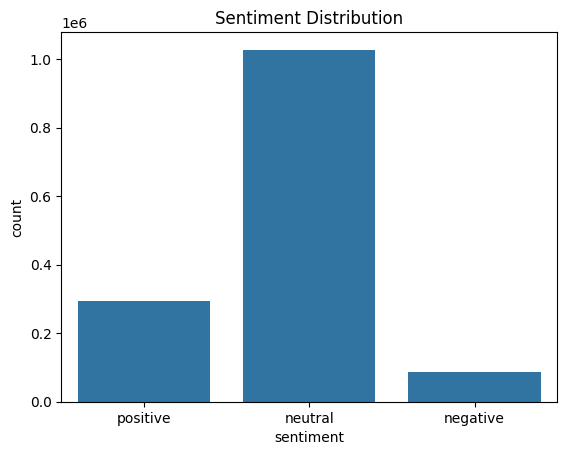

In [30]:
# Sentiment Distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

# Keywords Visualization
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['cleaned_headline']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()